## Testbank in one Set

Change your models in their definition and run the test

In [11]:
from neuron import h, gui
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp, phase, ih
from cells.neymotin import iteration1

reload(iteration1)
reload(generic)
Cell = iteration1.SPI6
Config = iteration1.Config

def HSoma():
    config = Config(h_somaModifier=1.00)
    return Cell(config)

def AIS():
    config = Config(aisL = 34)
    return Cell(config)

def Synapses():
    config = Config(nsynapses=10, synapsee=-45, synapseweight=-0.00001)
    return Cell(config)

def Default():
    config = Config()
    return Cell(config)

def AISHSoma():
    config = Config(aisL = 34,h_somaModifier=1.00)
    return Cell(config)

cellbuilder = HSoma

In [2]:
resistances, ih = ih.calculateInputResistanceAndIhSag(HSoma, plot=False)

In [13]:
def testbank(*args, precisiondigits=2, apthreshold = 10):
    results = []
    for cellbuilder in args:
        result = {}
        print(f"Calcuting Rhoebase for {cellbuilder.__name__}")
        undertrace, overtrace = rheobase.calculateRheobase(cellbuilder, precisiondigits=precisiondigits, plot=False, apthreshold = apthreshold) # We have a different apc threshold here
        result["name"] = cellbuilder.__name__
        result["rheo"] = (undertrace, overtrace)
              
        print(f"Calcuting RMP for {cellbuilder.__name__}")
        result["rmp"] = rmp.calculateRMP(cellbuilder, plot=False)
        result["ap-voltage"] = ap.calculateAPThresholdAndDerivative(overtrace)
        results.append(result)
        
    return results

In [14]:
results = testbank(Default,HSoma,AISHSoma)

Calcuting Rhoebase for Default
Calcuting RMP for Default
Calcuting Rhoebase for HSoma
Calcuting RMP for HSoma
Calcuting Rhoebase for AISHSoma
Calcuting RMP for AISHSoma


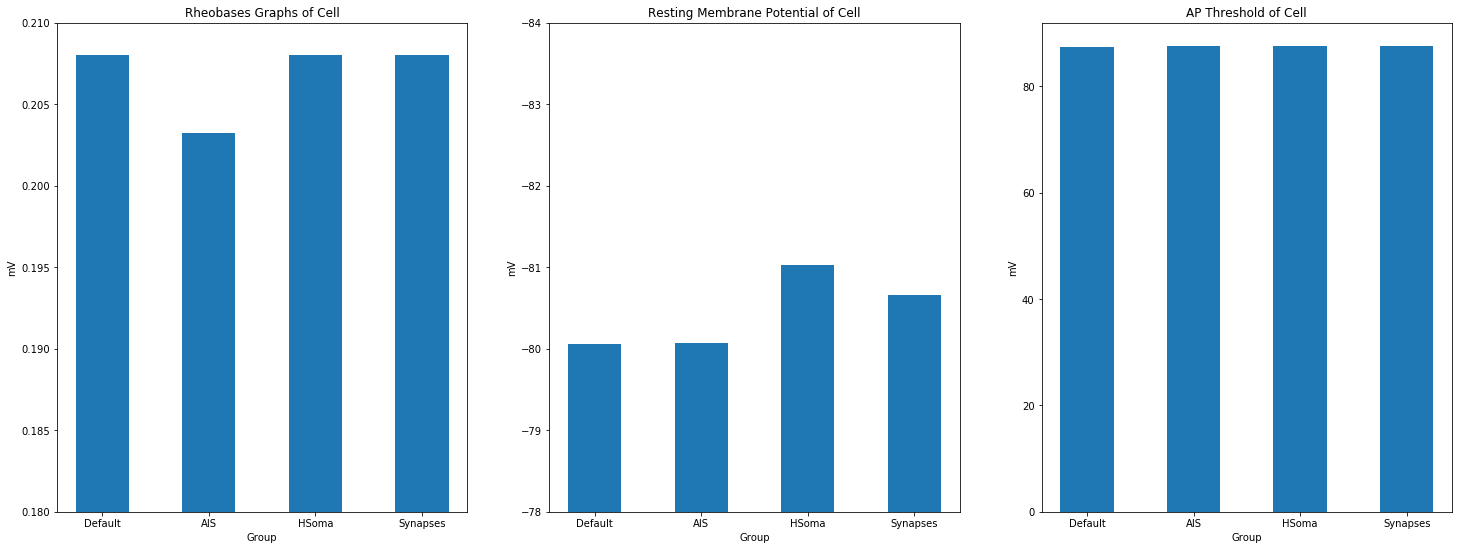

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plotTestbank(results):
    
    fig = plt.figure(figsize=(25,9)) # Default figsize is (8,6)
    names = [ item["name"] for item in results]
    index = np.arange(len(names))
    rheos = [ item["rheo"] for item in results]
    rmps = [ item["rmp"] for item in results]
    aps = [ item["ap-voltage"] for item in results]
    
    #Rheobase
    width = 0.5   
    ax = plt.subplot(131)
    ax.bar(index, [item[1]["params"]["amp"] for item in rheos], width)
    ax.set_xlabel('Group')
    ax.set_xticks(index)
    ax.set_xticklabels(names)
    ax.set_ylabel('mV')
    ax.set_ylim([0.18,0.21])
    ax.set_title("Rheobases Graphs of Cell")
    
    #Resting Potential
    ax2 = plt.subplot(132)
    ax2.bar(index, [item for item in rmps], width)
    ax2.set_xlabel('Group')
    ax2.set_xticks(index)
    ax2.set_xticklabels(names)
    ax2.set_ylabel('mV')
    ax2.set_ylim([-78,-84])
    ax2.set_title("Resting Membrane Potential of Cell")
    
    #FirstOver20Value
    ax3 = plt.subplot(133)
    ax3.bar(index, [ abs(item["peakValue"] - item["firstOver20Value"]) for item in aps], width)
    ax3.set_xlabel('Group')
    ax3.set_xticks(index)
    ax3.set_xticklabels(names)
    ax3.set_ylabel('mV')
    ax3.set_title("AP Threshold of Cell")
        
    plt.show()
    
plotTestbank(results)    

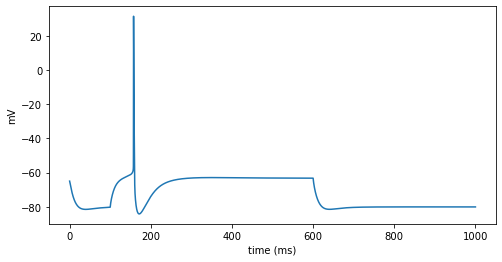

In [7]:
generic.plotTrace(results[0]["rheo"][1])

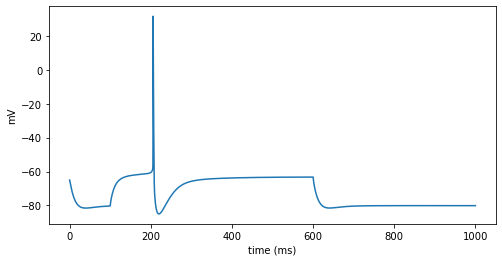

In [11]:
generic.plotTrace(results[3]["rheo"][1])

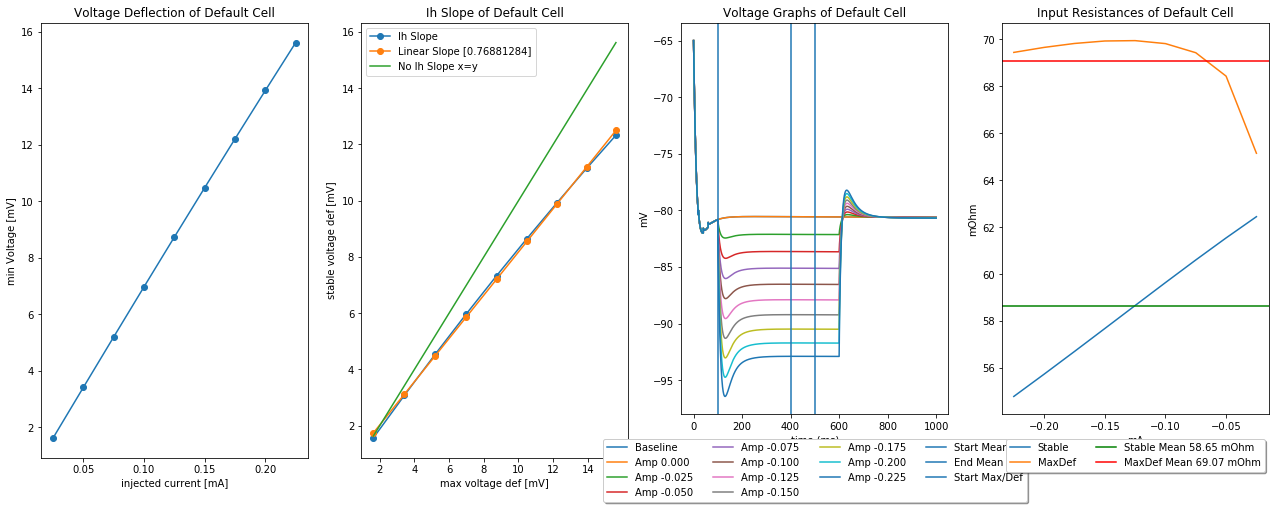

array([[-2.50000000e-02,  6.24460116e+01,  6.51461346e+01],
       [-5.00000000e-02,  6.15421649e+01,  6.84290756e+01],
       [-7.50000000e-02,  6.06032033e+01,  6.94259529e+01],
       [-1.00000000e-01,  5.96404467e+01,  6.98138667e+01],
       [-1.25000000e-01,  5.86643422e+01,  6.99404559e+01],
       [-1.50000000e-01,  5.76842250e+01,  6.99247638e+01],
       [-1.75000000e-01,  5.67081865e+01,  6.98195236e+01],
       [-2.00000000e-01,  5.57430367e+01,  6.96522823e+01],
       [-2.25000000e-01,  5.47943397e+01,  6.94392403e+01]])

In [6]:
ih.calculateInputResistanceAndIhSag(Default)

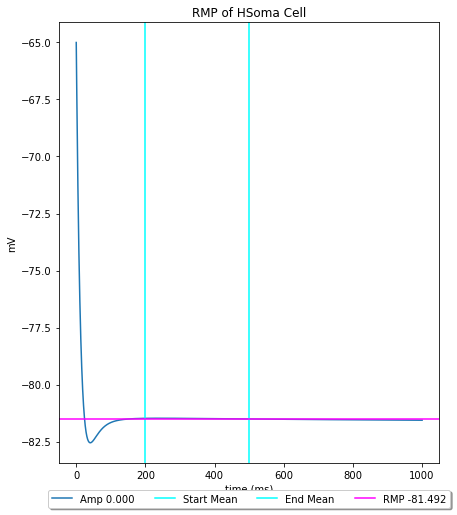

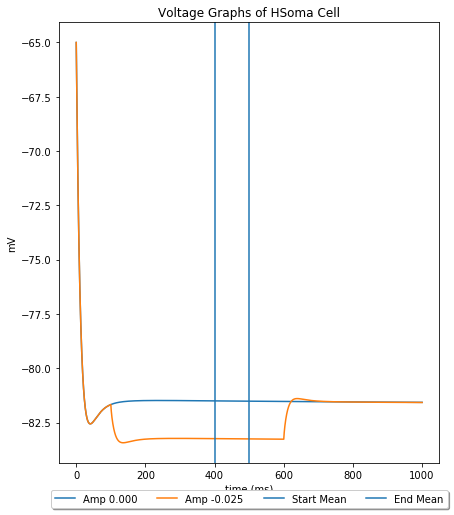

array([[-2.50000000e-02,  6.94746210e+01,  7.68378837e+01]])

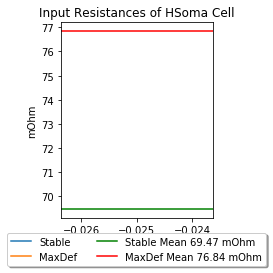

In [3]:
rmp.calculateRMP(HSoma, plot=True)
generic.calculateInputResistance(HSoma, mult=-0.025, iterations=2, plot=True, delay=100, duration=500)

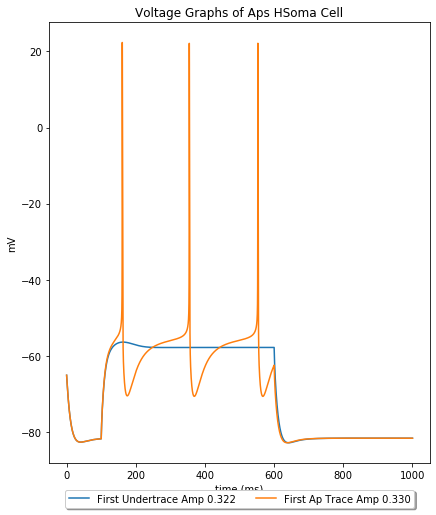

In [4]:
undertrace, overtrace = rheobase.calculateRheobase(HSoma, precisiondigits=2, plot=True, apthreshold = 10) # We have a different apc threshold here

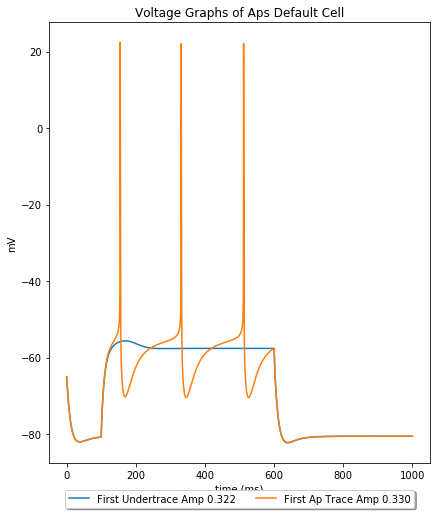

In [5]:
undertrace, overtrace = rheobase.calculateRheobase(Default, precisiondigits=2, plot=True, apthreshold = 10) # We have a different apc threshold here

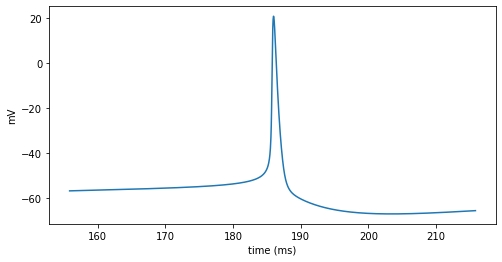

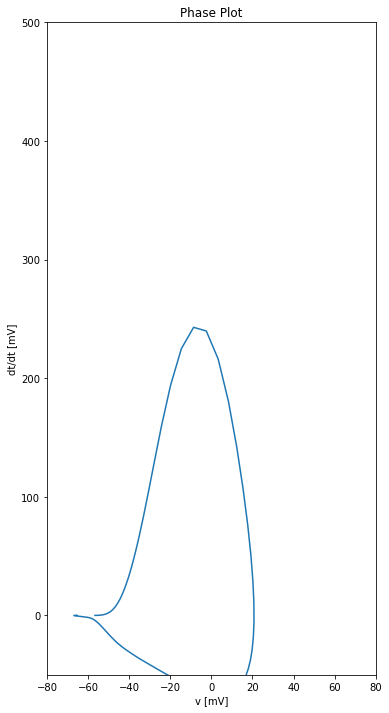

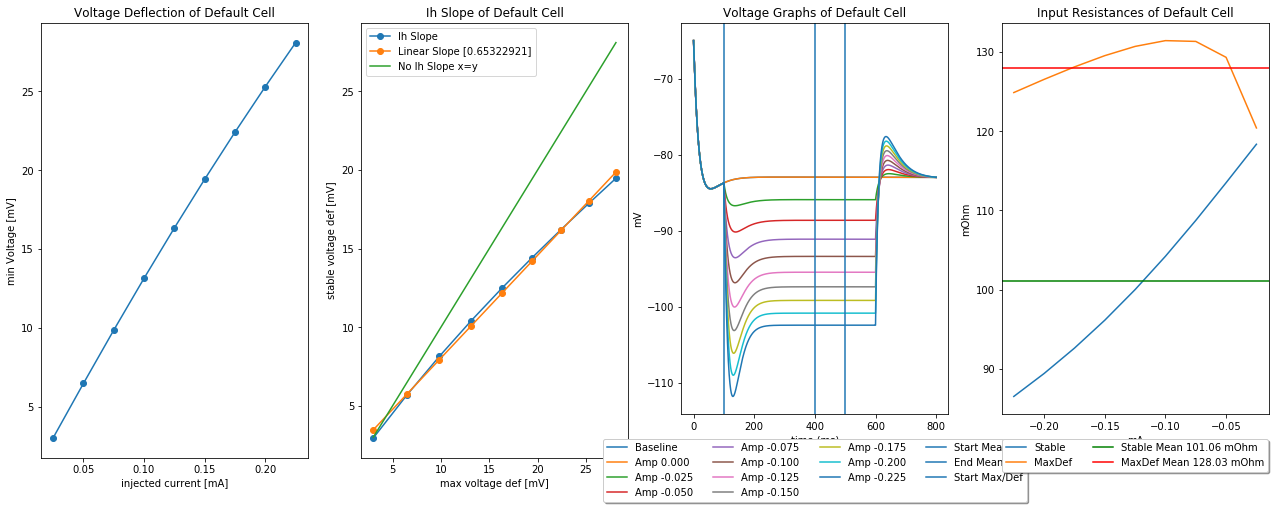

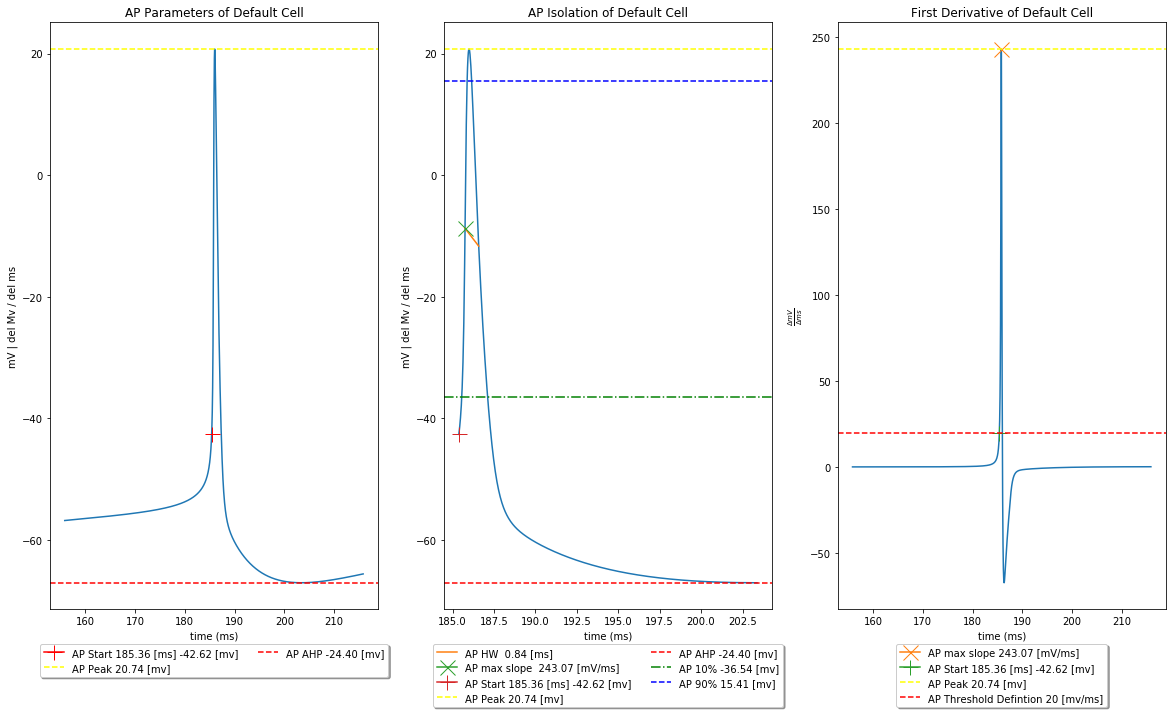

In [8]:
#foundtrace = ap.findFirstApWithinMS(cellbuilder, ms= 15) #is for the approach to get the first ap within ms
aptime = overtrace["aps"][0]
aptrace = generic.isolateTime(overtrace, aptime,30)

generic.plotTrace(aptrace)
phase.phasePlanePlot(aptrace)

ih.calculateInputResistanceAndIhSag(cellbuilder)
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)

In [31]:
overtrace

{'v': array([-65.        , -65.02910582, -65.06092727, ..., -81.00895328,
        -81.00894065, -81.00892803]),
 't': array([0.00000e+00, 2.50000e-02, 5.00000e-02, ..., 7.99950e+02,
        7.99975e+02, 8.00000e+02]),
 'aps': array([154.15 , 321.675, 490.65 ]),
 'cellbuilder': <function __main__.Default()>,
 'params': {'delay': 100, 'dur': 500, 'amp': 0.34720000000000006}}